In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
df = pd.read_csv('2017-fordgobike-tripdata.csv')

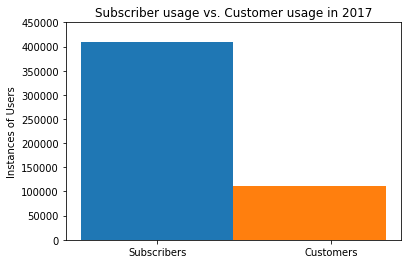

In [2]:
non_sub_count=len(df[df['user_type']=='Customer'])
sub_count=len(df[df['user_type']=='Subscriber'])

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_count, width)
p2 = plt.bar(ind+width, non_sub_count, width)

plt.ylabel('Instances of Users')
plt.title('Subscriber usage vs. Customer usage in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 500000,step=50000))

plt.show()

## Pricing of Go Ford Bike
### Customers
Single ride (up to 30 minutes) - 3.00

Day Access (unlimited 30 minute rides) - 10.00

3 Day Access (unlimited 30 minute rides) - 20.00

### Subscribers
Monthly Subscriber(unlimited 45 minutes) - 15.00

### Late Fees
Bikes kept out longer than allowed trip time - 3.00 per 15 minutes

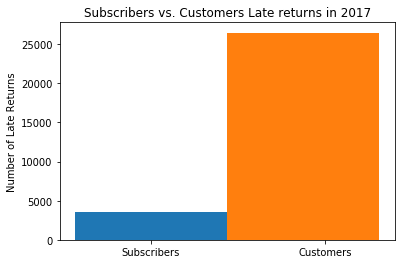

In [3]:
# want to obtain the amount of income from subscribers versus customers
# to change for seconds to minutes need to use module 60 and divide by 60
# need to obtain a list of customer that went over their allowed time, use divide 15 to see increments
late_group = df[df['duration_sec'] > 1800]
sub_late_group = late_group[late_group['duration_sec'] > 2700]
non_sub_late=late_group[late_group['user_type']=='Customer']
#Note that subscribers have a time limit of 45 minutes
sub_late=sub_late_group[sub_late_group['user_type']=='Subscriber']

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, len(sub_late), width)
p2 = plt.bar(ind+width, len(non_sub_late), width)

plt.ylabel('Number of Late Returns')
plt.title('Subscribers vs. Customers Late returns in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 30000,step=5000))

plt.show()

In [4]:
# make a list containing the number of seconds that subs went over
# can only be ran once due to stacking values
non_sub_late['duration_sec']=non_sub_late['duration_sec']- 1800
sub_late['duration_sec']=sub_late['duration_sec']-2700

/home/juvenal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/juvenal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


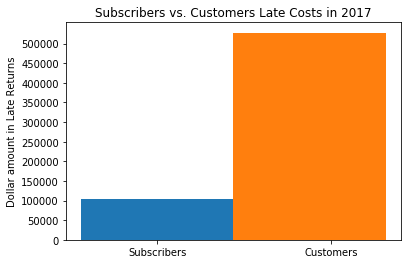

In [5]:
non_sub_late_income=non_sub_late[['user_type','duration_sec']].groupby('user_type').sum()
sub_late_income=sub_late[['user_type','duration_sec']].groupby('user_type').sum()
#divide by 60 to obtain minutes
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']/60
sub_late_income['duration_sec']=sub_late_income['duration_sec']/60
#divide by 15 to see the total increments that they went over 
non_sub_late_income['duration_sec']=math.ceil(non_sub_late_income['duration_sec']/15)
sub_late_income['duration_sec']=math.ceil(sub_late_income['duration_sec']/15)
# multiply by 3 per 15
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']*3
sub_late_income['duration_sec']=sub_late_income['duration_sec']*3

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_late_income['duration_sec'], width)
p2 = plt.bar(ind+width, non_sub_late_income['duration_sec'], width)

plt.ylabel('Dollar amount in Late Returns')
plt.title('Subscribers vs. Customers Late Costs in 2017' )
#plt.xticks(np.arange(0, 1, step=0.5), ('{}'.format('Subscribers')),'{}'.format('Customers'))
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 530000,step=50000))
plt.show()
#change to average latefee

In [6]:
df_route=df[['start_station_name','end_station_name','duration_sec']].groupby(['start_station_name','end_station_name']).count().sort_values('duration_sec', ascending=False)
route_20=df_route.reset_index().head(20)

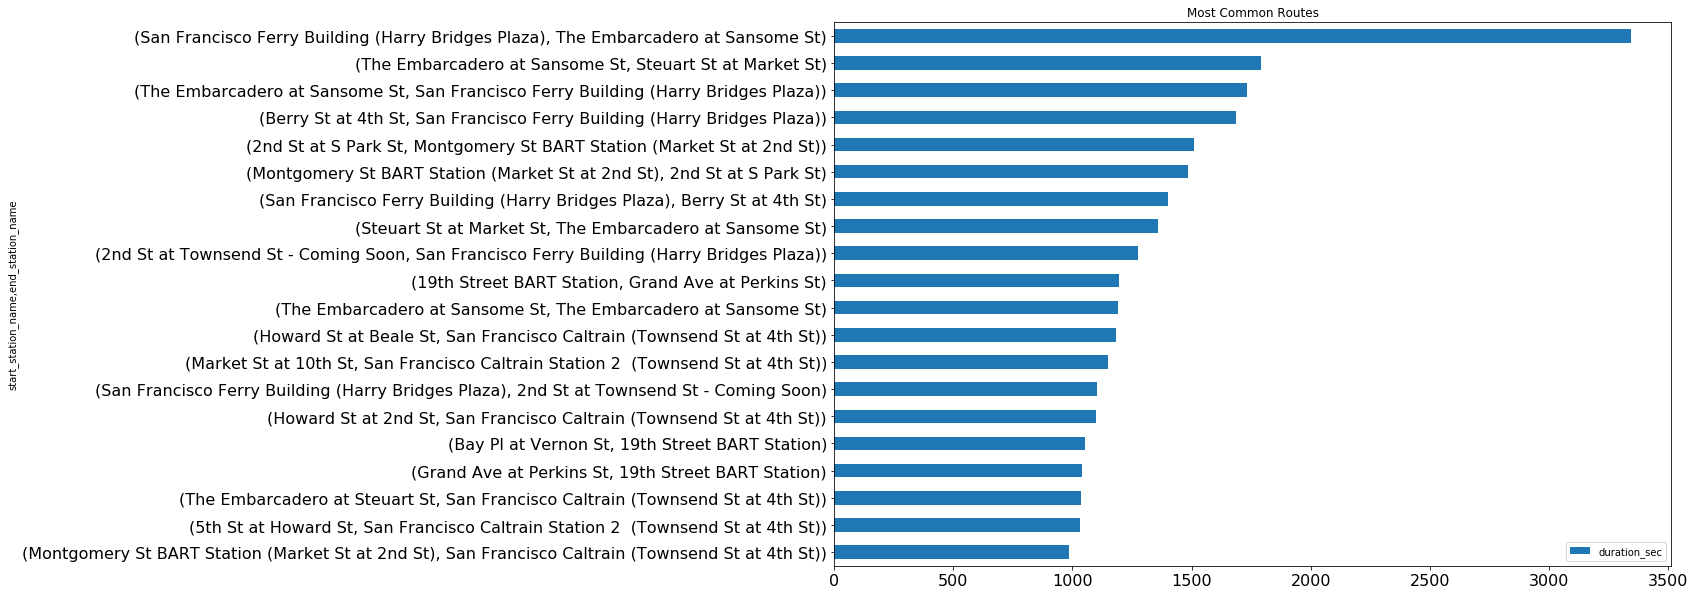

In [7]:
df_route.head(20).sort_values('duration_sec',ascending=True).plot(title='Most Common Routes',kind='barh',figsize=(15,10),fontsize=16,sort_columns=True)

In [8]:

df_route_distance = df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).count().sort_values('duration_sec', ascending=False)

distance_df = np.arange(len(df_route_distance),dtype=np.float)
#Make list, find distance, save that distance to new list
# approximate radius of earth in km
R = 6373.0
for m in range(0,len(df_route_distance)):
    start_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_latitude'])
    start_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_longitude'])
    end_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_latitude'])
    end_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_longitude'])
    
    dlon = end_long - start_long
    dlat = end_lat - start_lat

    a = math.sin(dlat / 2)**2 + math.cos(start_lat) * math.cos(end_lat) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance_df[m] = R * c
    

Text(0.5,0,'Distance is Kilometers')

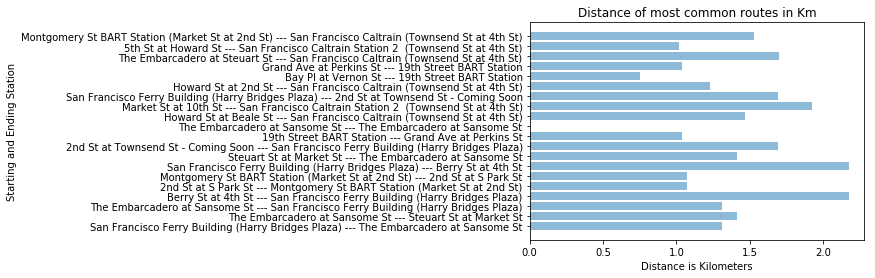

In [9]:
route_20['Distance']=distance_df[0:20]
route_20['Trip']=route_20['start_station_name'].map(str)+" --- "+route_20['end_station_name']
plt.barh(route_20['Trip'], route_20['Distance'], align='center', alpha=0.5)
plt.title('Distance of most common routes in Km')
plt.ylabel('Starting and Ending Station')
plt.xlabel('Distance is Kilometers')

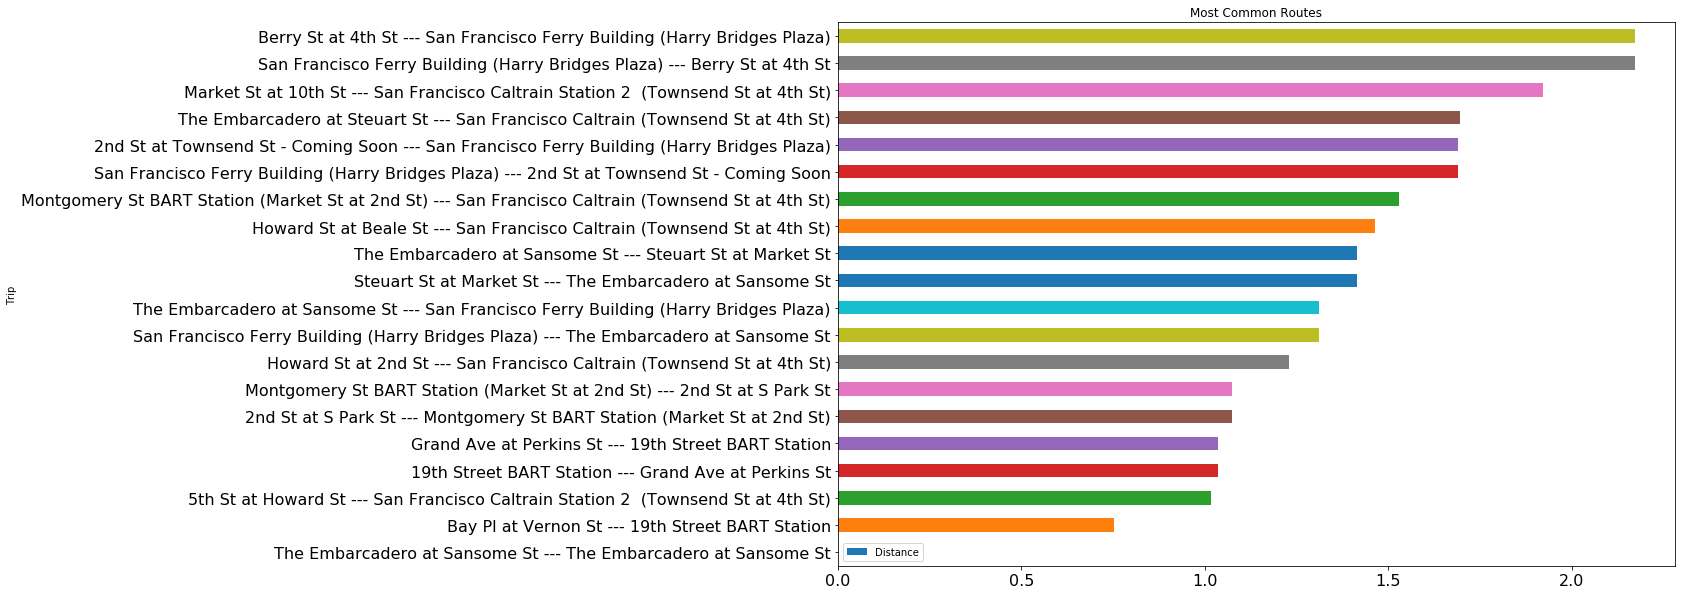

In [67]:
route_20.sort_values('Distance').plot(x='Trip',y='Distance',title='Most Common Routes',kind='barh',figsize=(15,10),fontsize=16,sort_columns=True)

In [49]:
df_station_count_start=df[['start_station_name','duration_sec']].groupby(['start_station_name']).count().sort_values('start_station_name', ascending=False).reset_index()
df_station_count_end=df[['end_station_name','duration_sec']].groupby(['end_station_name']).count().sort_values('end_station_name', ascending=False).reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5718133c50>]],
      dtype=object)

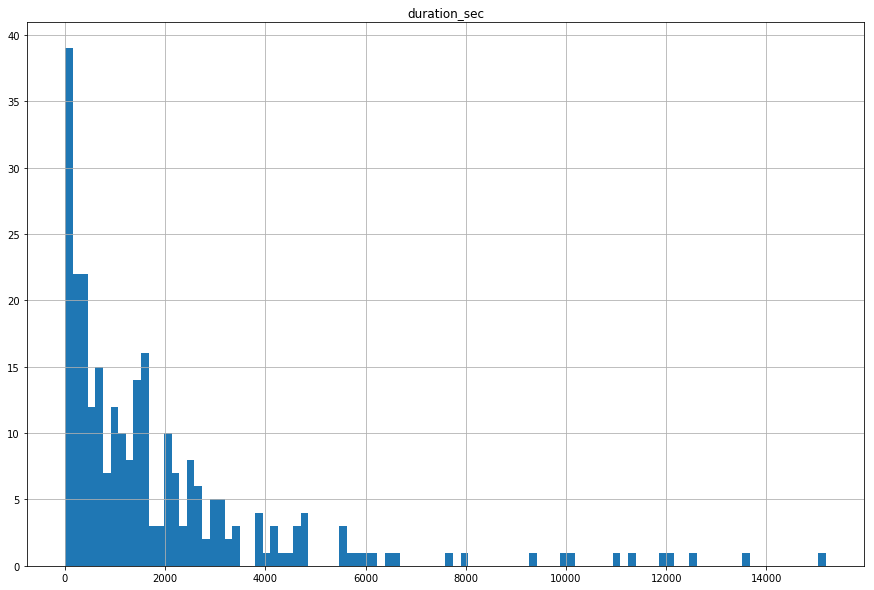

In [50]:
df_station_count_start.hist(bins=100,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57180aa7b8>]],
      dtype=object)

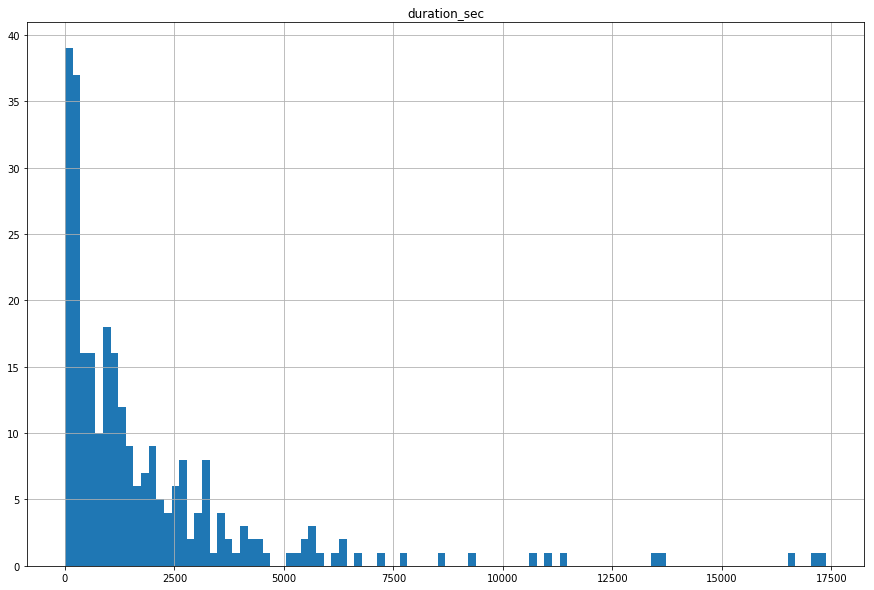

In [51]:
df_station_count_end.hist(bins=100,figsize=(15,10))

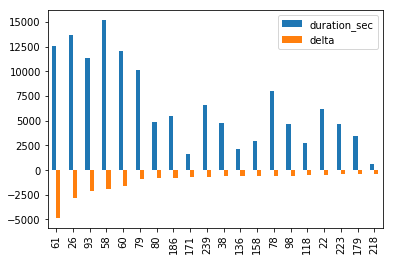

In [65]:
df_station_count_start['delta']=df_station_count_start['duration_sec']-df_station_count_end['duration_sec']
df_station_count_start.sort_values('delta', ascending=True).head(20).plot(kind='bar')

In [16]:
from datetime import datetime

df['start_time']=df['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df['end_time']=df['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [17]:
df_time_index=df.set_index('start_time')

duration_sec                end_time  \
start_time                                                      
2017-12-31 16:57:39.654         80110 2018-01-01 15:12:50.245   
2017-12-31 15:56:34.842         78800 2018-01-01 13:49:55.617   
2017-12-31 22:45:48.411         45768 2018-01-01 11:28:36.883   
2017-12-31 17:31:10.636         62172 2018-01-01 10:47:23.531   
2017-12-31 14:23:14.001         43603 2018-01-01 02:29:57.571   
2017-12-31 22:51:00.918          9226 2018-01-01 01:24:47.166   
2017-12-31 23:49:28.422          4507 2018-01-01 01:04:35.619   
2017-12-31 23:46:37.196          4334 2018-01-01 00:58:51.211   
2017-12-31 23:37:07.548          4150 2018-01-01 00:46:18.308   
2017-12-31 23:35:38.145          4238 2018-01-01 00:46:17.053   
2017-12-31 23:46:32.403          3292 2018-01-01 00:41:24.605   
2017-12-31 23:48:11.757          3177 2018-01-01 00:41:09.581   
2017-12-31 23:52:55.581          2183 2018-01-01 00:29:18.743   
2017-12-31 23:52:55.937          2170 2018-01-01 00:29:06.924   
2017-12-31 23:35:23.222          2697 2018-01-01 00:20:20.813   
2017-12-31 23:53:38.943          1544 2018-01-01 00:19:23.047   
2017-12-31 23:54:40.146          1474 2018-01-01 00:19:14.351   
2017-12-31 23:55:09.686          1397 2018-01-01 00:18:26.721   
2017-12-31 23:52:49.497          1532 2018-01-01 00:18:21.953   
2017-12-31 23:46:33.993          1216 2018-01-01 00:06:50.058   
2017-12-31 23:59:01.261           386 2018-01-01 00:05:27.809   
2017-12-31 22:52:22.286          4174 2018-01-01 00:01:56.614   
2017-12-31 23:54:25.337           422 2018-01-01 00:01:27.354   
2017-12-31 23:35:55.543          1165 2017-12-31 23:55:21.220   
2017-12-31 23:36:03.555          1149 2017-12-31 23:55:13.465   
2017-12-31 23:36:16.069          1130 2017-12-31 23:55:06.096   
2017-12-31 23:36:34.548          1003 2017-12-31 23:53:18.195   
2017-12-31 23:38:24.874           862 2017-12-31 23:52:47.542   
2017-12-31 23:37:47.192           871 2017-12-31 23:52:18.473   
2017-12-31 23:39:13.084           784 2017-12-31 23:52:17.293   
...                               ...                     ...   
2017-06-28 10:45:45.282           123 2017-06-28 10:47:49.158   
2017-06-28 10:44:17.050            73 2017-06-28 10:45:30.337   
2017-06-28 10:13:23.320          1909 2017-06-28 10:45:12.700   
2017-06-28 10:13:24.229          1908 2017-06-28 10:45:12.500   
2017-06-28 10:32:04.391           672 2017-06-28 10:43:16.966   
2017-06-28 10:32:52.865           602 2017-06-28 10:42:55.042   
2017-06-28 10:26:50.456           893 2017-06-28 10:41:43.469   
2017-06-28 10:19:28.884          1136 2017-06-28 10:38:25.287   
2017-06-28 10:33:51.414           268 2017-06-28 10:38:19.465   
2017-06-28 10:30:41.191           321 2017-06-28 10:36:02.981   
2017-06-28 10:22:05.932           797 2017-06-28 10:35:23.631   
2017-06-28 10:18:36.598           720 2017-06-28 10:30:37.527   
2017-06-28 10:21:47.840           484 2017-06-28 10:29:52.298   
2017-06-28 10:12:57.907           889 2017-06-28 10:27:47.444   
2017-06-28 10:17:46.556           510 2017-06-28 10:26:16.648   
2017-06-28 10:17:41.989           486 2017-06-28 10:25:48.804   
2017-06-28 10:16:50.199           379 2017-06-28 10:23:09.276   
2017-06-28 10:11:26.829           640 2017-06-28 10:22:07.518   
2017-06-28 10:14:11.410           410 2017-06-28 10:21:01.580   
2017-06-28 10:16:16.575           278 2017-06-28 10:20:55.077   
2017-06-28 10:09:06.498           553 2017-06-28 10:18:20.411   
2017-06-28 09:56:55.488          1086 2017-06-28 10:15:02.469   
2017-06-28 09:50:59.175          1201 2017-06-28 10:11:00.359   
2017-06-28 10:00:59.041           590 2017-06-28 10:10:49.486   
2017-06-28 09:58:33.669           730 2017-06-28 10:10:44.213   
2017-06-28 10:00:54.528           435 2017-06-28 10:08:10.438   
2017-06-28 09:56:39.631           431 2017-06-28 10:03:51.090   
2017-06-28 09:47:36.347           424 2017-06-28 09:54:41.187   
2017-06-28 09:47:41.664           366 2017-06-28 09:53:47.71

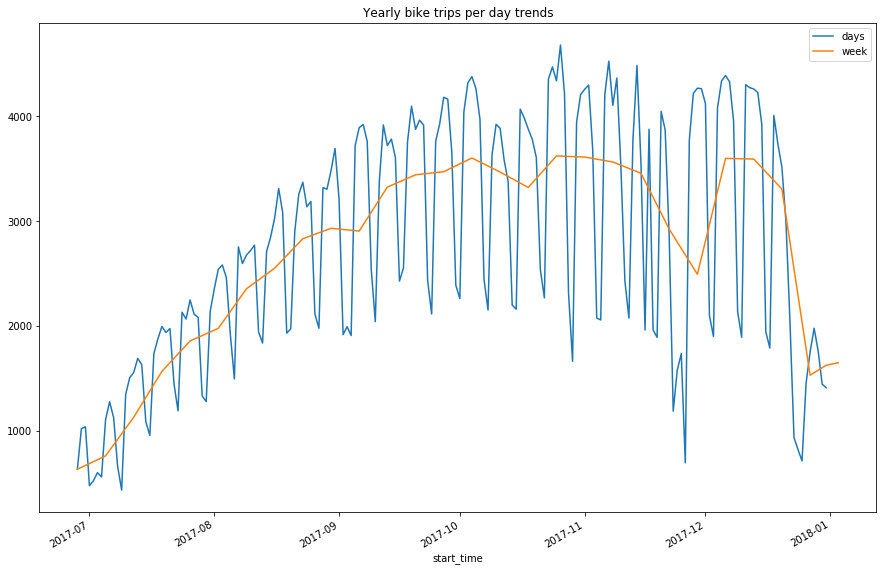

In [18]:
df_resample=df_time_index['duration_sec'].resample('D').count()
df_resample_week = df_resample.resample('W-WED').mean()
df_resample_day_and_week=pd.concat([df_resample,df_resample_week], axis=1)
df_resample_day_and_week.columns=['days','week']
df_resample_day_and_week
df_resample_day_and_week['week']=df_resample_day_and_week['week'].interpolate()
df_resample_day_and_week.plot(figsize=(15,10),title='Yearly bike trips per day trends')
#do it hourly with mean
#do it weekly, join with daily for trend
#groupby and then pivot(for stations)

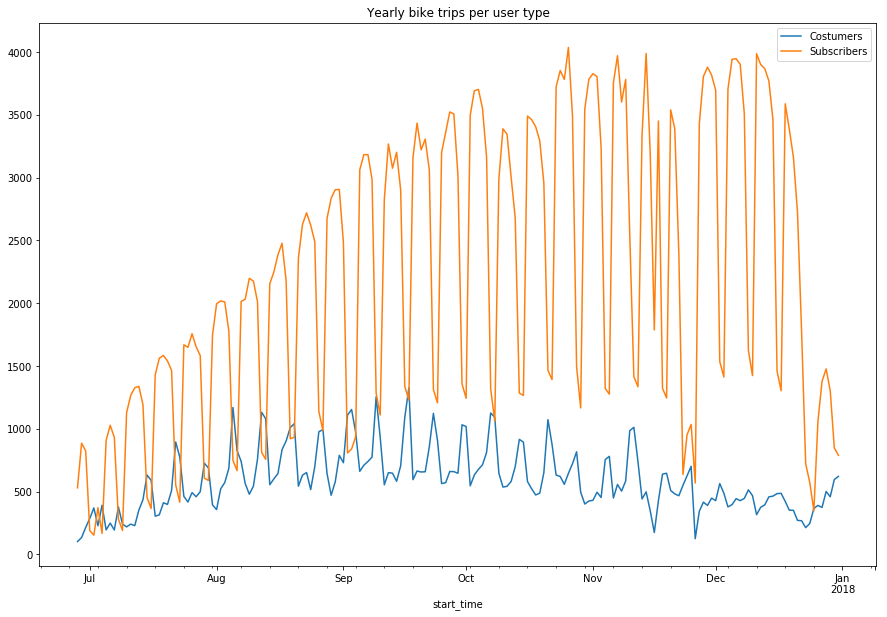

In [19]:
df_cus_time=df_time_index[df_time_index['user_type']=='Customer'].resample('D').count()
df_sub_time=df_time_index[df_time_index['user_type']=='Subscriber'].resample('D').count()
df_user_time=pd.concat([df_cus_time['duration_sec'],df_sub_time['end_time']], axis=1)
df_user_time.columns=['Costumers','Subscribers']
df_user_time.plot(figsize=(15,10),title='Yearly bike trips per user type')

Text(0.5,1,'Thanksgiving Hours of Data')

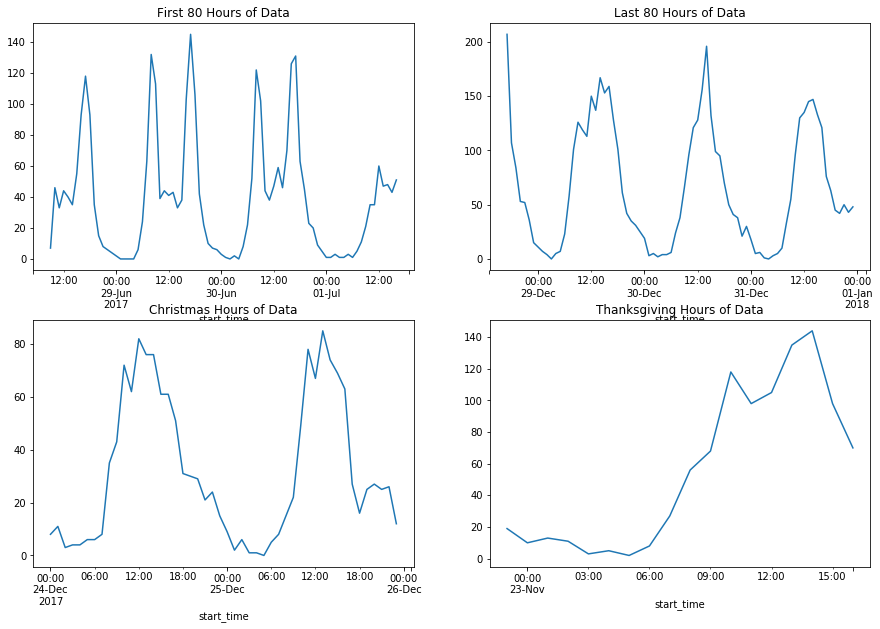

In [20]:
df_resample_hour=df_time_index['duration_sec'].resample('H').count()
fig, axes = plt.subplots(nrows=2, ncols=2)
df_resample_hour.iloc[0:80].plot(ax=axes[0,0],figsize=(15,10))
axes[0,0].set_title('First 80 Hours of Data')
df_resample_hour.iloc[4400:4500].plot(ax=axes[0,1],figsize=(15,10))
axes[0,1].set_title('Last 80 Hours of Data')
df_resample_hour.iloc[4287:4335].plot(ax=axes[1,0],figsize=(15,10))
axes[1,0].set_title('Christmas Hours of Data')
df_resample_hour.iloc[3542:3560].plot(ax=axes[1,1],figsize=(15,10))
axes[1,1].set_title('Thanksgiving Hours of Data')

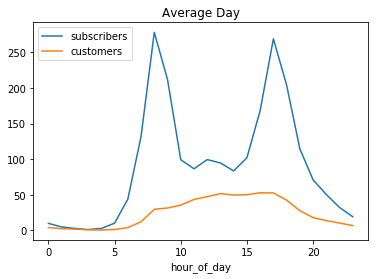

In [21]:
df_mean_day_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_day_cus=df_time_index[df_time_index['user_type']=='Customer']
df_mean_day_sub=df_mean_day_sub['duration_sec'].resample('H').count()
df_mean_day_cus=df_mean_day_cus['duration_sec'].resample('H').count()
df_mean_day_sub=df_mean_day_sub.reset_index()
df_mean_day_cus=df_mean_day_cus.reset_index()
df_mean_day_sub['hour_of_day']=df_mean_day_sub['start_time'].dt.hour
df_mean_day_cus['hour_of_day']=df_mean_day_cus['start_time'].dt.hour
df_mean_day_sub.columns=['start_time','subscribers','hour_of_day']
df_mean_day_cus.columns=['start_time','customers','hour_of_day']
df_mean_day_sub=df_mean_day_sub[['subscribers','hour_of_day']].groupby('hour_of_day').mean()
df_mean_day_cus=df_mean_day_cus[['customers','hour_of_day']].groupby('hour_of_day').mean()
df_mean_day_sub['customers']=df_mean_day_cus['customers']
df_mean_day_sub.plot(title='Average Day')

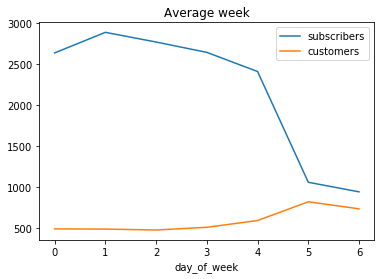

In [22]:
df_mean_week_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_week_cus=df_time_index[df_time_index['user_type']=='Customer']
df_mean_week_sub=df_mean_week_sub['duration_sec'].resample('D').count()
df_mean_week_cus=df_mean_week_cus['duration_sec'].resample('D').count()
df_mean_week_sub=df_mean_week_sub.reset_index()
df_mean_week_cus=df_mean_week_cus.reset_index()
df_mean_week_sub['day_of_week']=df_mean_week_sub['start_time'].dt.dayofweek
df_mean_week_cus['day_of_week']=df_mean_week_cus['start_time'].dt.dayofweek
df_mean_week_sub.columns=['start_time','subscribers','day_of_week']
df_mean_week_cus.columns=['start_time','customers','day_of_week']
df_mean_week_sub=df_mean_week_sub[['subscribers','day_of_week']].groupby('day_of_week').mean()
df_mean_week_cus=df_mean_week_cus[['customers','day_of_week']].groupby('day_of_week').mean()
df_mean_week_sub['customers']=df_mean_week_cus['customers']
df_mean_week_sub.plot(title='Average week')

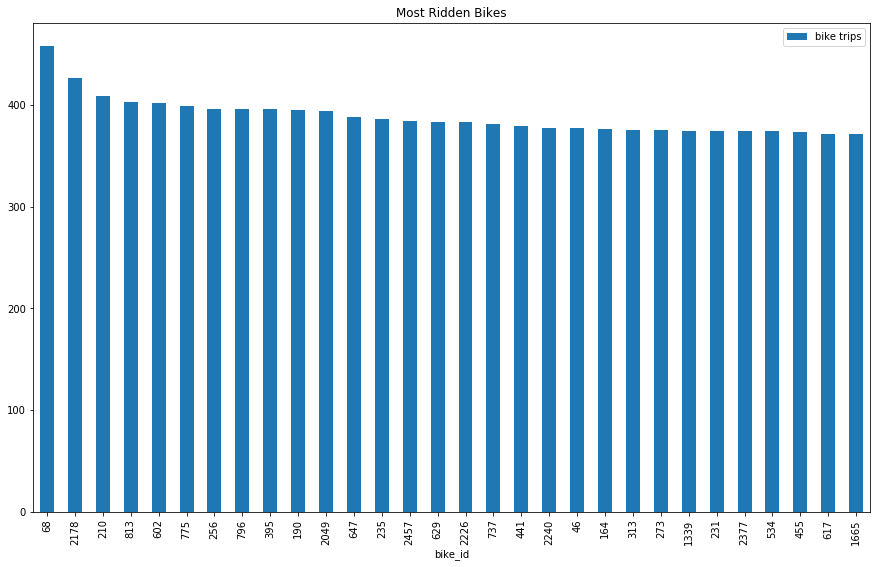

In [23]:
bike_id_count=df[['bike_id','duration_sec']].groupby(['bike_id']).count().sort_values('duration_sec', ascending=False)
# use sum with duration seconds to see which bike was the most ridden
bike_id_index = bike_id_count.index.values
bike_id_count.columns=['bike trips']
bike_id_count.head(30).plot(kind='bar', figsize=(15,9),title='Most Ridden Bikes')

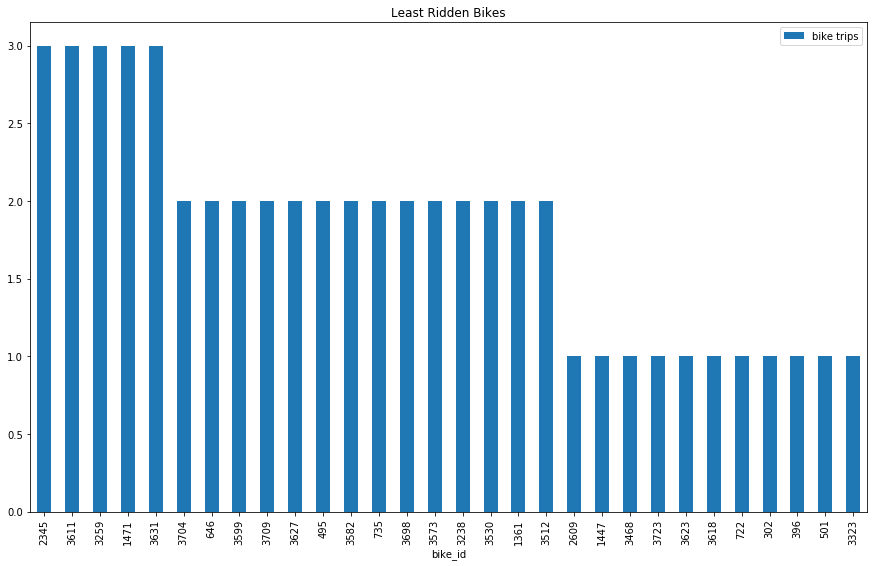

In [24]:
bike_id_count.tail(30).plot(kind='bar', figsize=(15,9),title='Least Ridden Bikes')

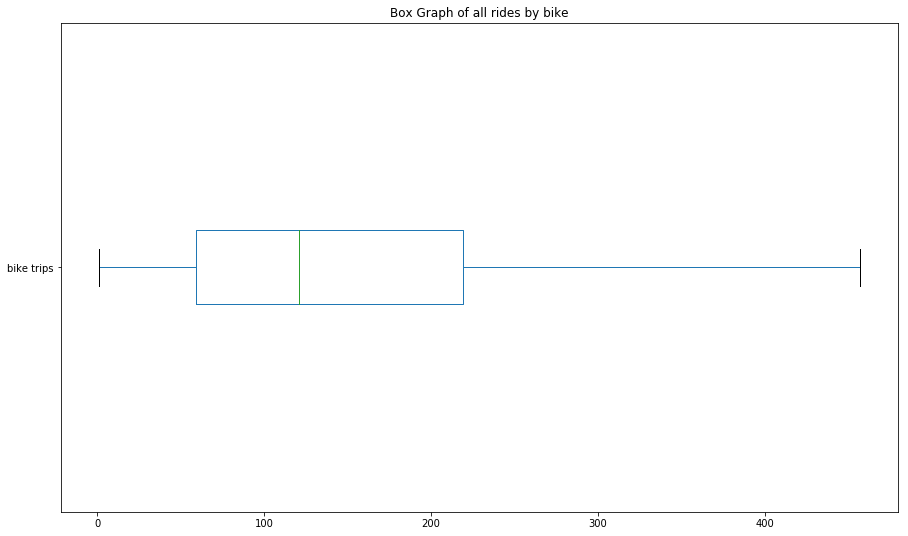

In [25]:
bike_id_count.plot.box(figsize=(15,9),vert=False,title='Box Graph of all rides by bike')

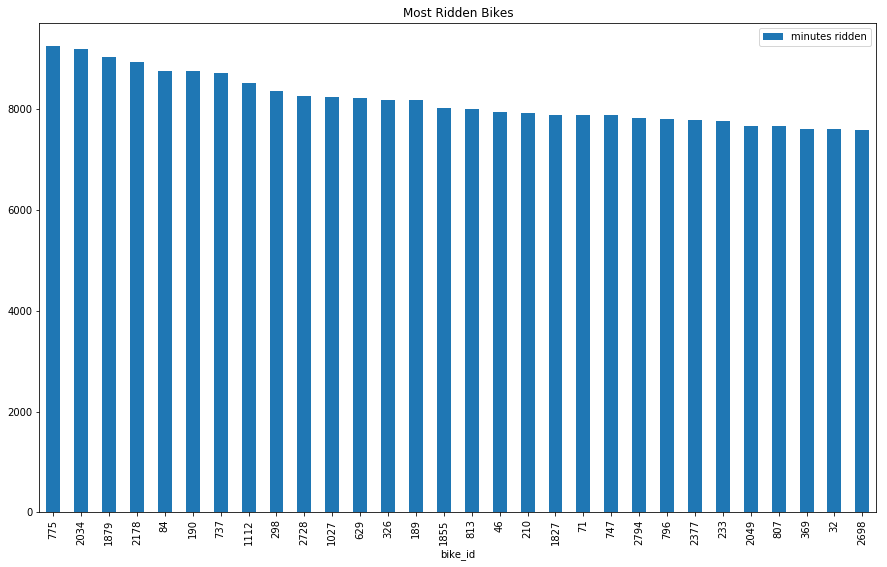

In [26]:
bike_id_sum=df[['bike_id','duration_sec']].groupby(['bike_id']).sum().sort_values('duration_sec', ascending=False)
bike_id_sum.columns=['Seconds Ridden']
bike_id_sum['Seconds Ridden']=bike_id_sum['Seconds Ridden']/60
bike_id_sum.columns=['minutes ridden']
bike_id_sum.head(30).plot(kind='bar', figsize=(15,9),title='Most Ridden Bikes')

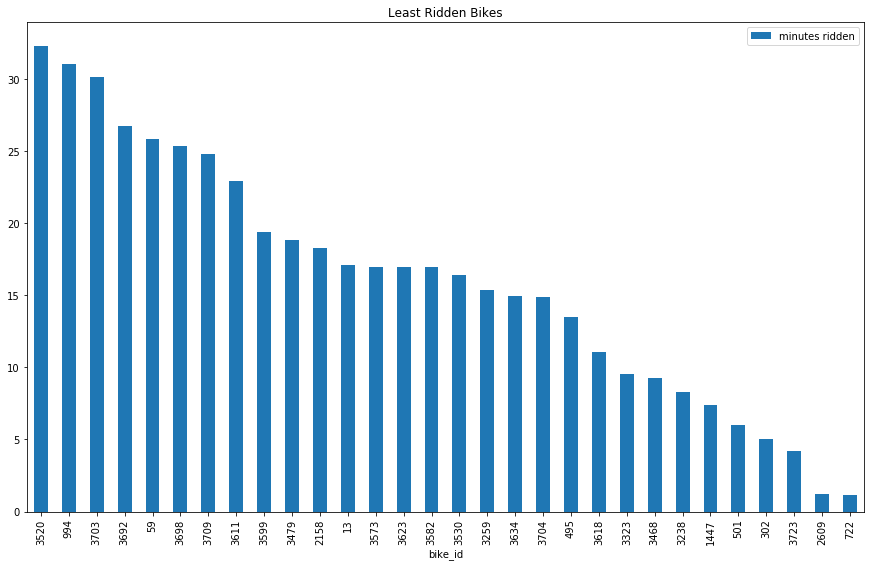

In [27]:
bike_id_sum.tail(30).plot(kind='bar', figsize=(15,9),title='Least Ridden Bikes')

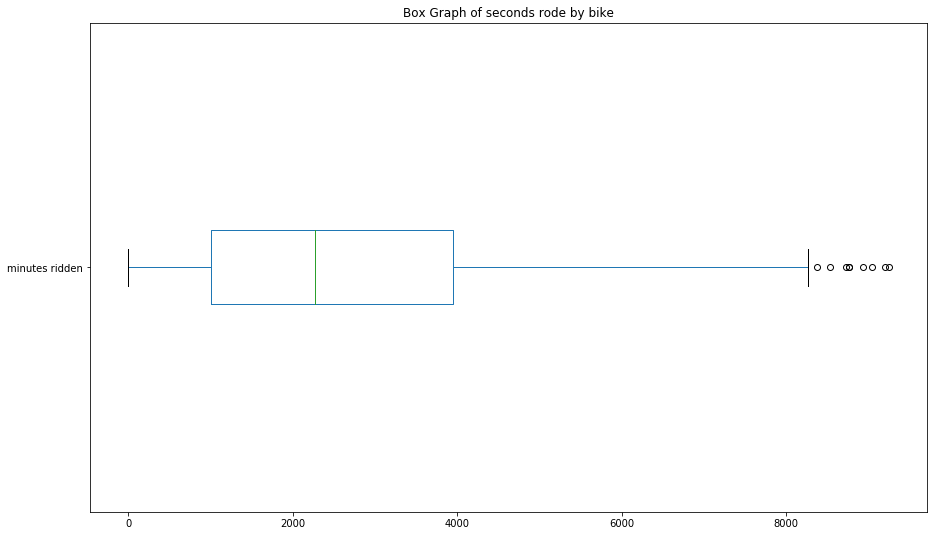

In [28]:
bike_id_sum.plot.box(figsize=(15,9),vert=False,title='Box Graph of seconds rode by bike')

Text(0,0.5,'number of total minutes')

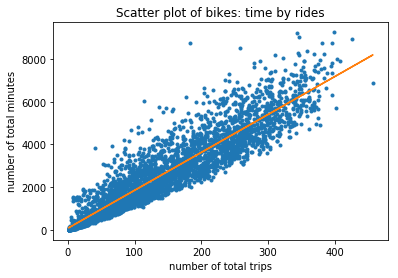

In [29]:
bike_id_count_sum = pd.concat([bike_id_count,bike_id_sum], axis=1)
# Fit with polyfit
m, b = np.polyfit(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], 1)

plt.plot(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], '.')
plt.plot(bike_id_count_sum['bike trips'], b + m * bike_id_count_sum['bike trips'], '-')
plt.title('Scatter plot of bikes: time by rides')
plt.xlabel('number of total trips')
plt.ylabel('number of total minutes')

Text(0,0.5,'quantity of bikes')

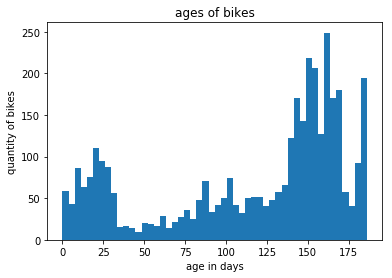

In [30]:
df_bike_age=df[['bike_id','start_time']].groupby('bike_id').agg([np.max,np.min,np.count_nonzero])
df_bike_age.columns=['last date','first date','trip count']
df_bike_age['age']= abs((df_bike_age['last date'] - df_bike_age['first date']))
df_bike_age['delta_2018']= abs(df_bike_age['last date'] - datetime(2018, 1, 1, 0, 0))
df_bike_age['age']=df_bike_age['age'].dt.days
df_bike_age['delta_2018']=df_bike_age['delta_2018'].dt.days
df_bike_age=df_bike_age.reset_index()
plt.hist(df_bike_age['age'],bins=50)
plt.title('ages of bikes')
plt.xlabel('age in days')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

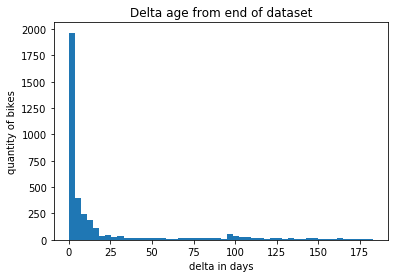

In [31]:
plt.hist(df_bike_age['delta_2018'],bins=50)
plt.title('Delta age from end of dataset')
plt.xlabel('delta in days')
plt.ylabel('quantity of bikes')

In [32]:
df_bike_age['out of commision']=df_bike_age['delta_2018'].apply(lambda x:x>25)

Text(0,0.5,'quantity of bikes')

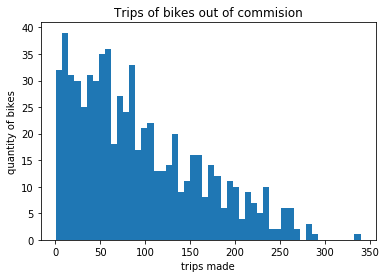

In [33]:
#df_bike_age[df_bike_age['out of commision']==True].hist(column='trip count')
plt.hist(df_bike_age[df_bike_age['out of commision']==True]['trip count'],bins=50)
plt.title('Trips of bikes out of commision')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

In [34]:
min_date=df_bike_age['first date'].min()

Text(0,0.5,'quantity of bikes')

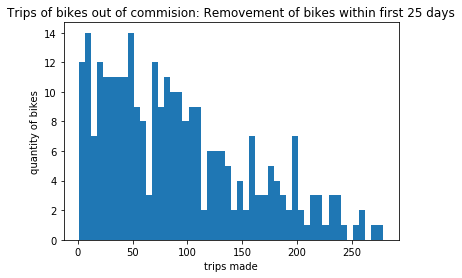

In [35]:
from datetime import timedelta
#df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)].hist(column='trip count',bins=20)
plt.hist(df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)]['trip count'],bins=50)
plt.title('Trips of bikes out of commision: Removement of bikes within first 25 days')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

In [36]:
from scipy.stats import poisson
df_bike_age['poisson_trip']=poisson.cdf(df_bike_age['trip count'],df_bike_age['trip count'].mean())

Text(0,0.5,'quantity of bikes')

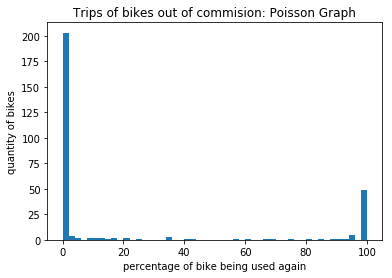

In [37]:
#df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)].hist(column='poisson_age',bins=20)
plt.hist(df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)]['poisson_trip']*100,bins=50)
plt.title('Trips of bikes out of commision: Poisson Graph')
plt.xlabel('percentage of bike being used again')
plt.ylabel('quantity of bikes')

In [38]:
bike_id_count['poisson_trips']=poisson.cdf(bike_id_count['bike trips'],bike_id_count['bike trips'].mean())
#print(poisson.cdf(50,bike_id_count['bike trips'].mean()))
#bike_id_count.hist(column='poisson_trips',bins=20)

Text(0,0.5,'quantity of bikes')

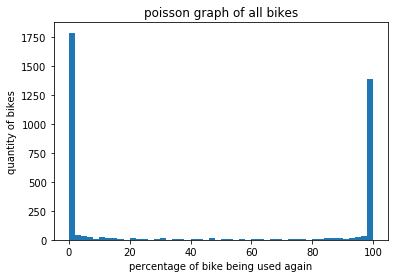

In [39]:
#bike_id_count.hist(column='poisson_trips',bins=20)
plt.hist(bike_id_count['poisson_trips']*100,bins=50)
plt.title('poisson graph of all bikes')
plt.xlabel('percentage of bike being used again')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

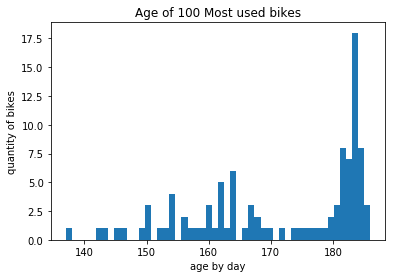

In [40]:
df_bike_top=df_bike_age.sort_values('trip count', ascending=False).head(100)
plt.hist(df_bike_top['age'],bins=50)
plt.title('Age of 100 Most used bikes')
plt.xlabel('age by day')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

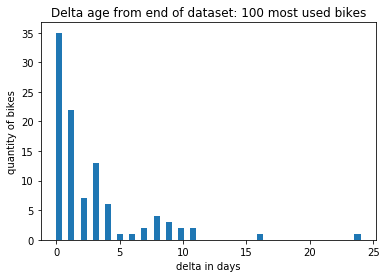

In [41]:
plt.hist(df_bike_top['delta_2018'],bins=50)
plt.title('Delta age from end of dataset: 100 most used bikes')
plt.xlabel('delta in days')
plt.ylabel('quantity of bikes')

Text(0,0.5,'age of bike (days)')

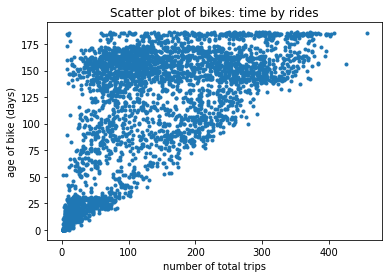

In [42]:
#df_bike_age
# Fit with polyfit
#m, b = np.polyfit(df_bike_age['trip count'], df_bike_age['age'], 1)

plt.plot(df_bike_age['trip count'], df_bike_age['age'], '.')
#plt.plot(df_bike_age['trip count'], b + m * df_bike_age['trip count'], '-')
plt.title('Scatter plot of bikes: time by rides')
plt.xlabel('number of total trips')
plt.ylabel('age of bike (days)')